This Notebook is to test things to use UMAP metadata to produce a progress metric based on ball position, time and event index. The idea is that then we can map individual contact to their progress value and see if they evolve over time.

In [1]:
import pandas as pd

import seaborn as sns

import cv2
import matplotlib.pyplot as plt
import numpy as np
import sys
import math
from pathlib import Path

In [2]:
input_path = "/mnt/upramdya_data/MD/Ballpushing_Exploration/Datasets/250312_StdContacts_Ctrl_noRandom_cutoff_300frames_Data/UMAP/250312_pooled_standardized_contacts.feather"

output_dir = "/mnt/upramdya_data/MD/Ballpushing_Exploration/Behavior_classification/UMAP/250313_Pooled_FeedingState_InteractionsOnly_300Frames_Progress"

In [3]:
umap = pd.read_feather(input_path)

# Progress metric

Here we're gonna try to see if we can generate a coherent progress metric based on ball positions, time and event index.

First let's plot the relative euclidian distance over event index to see if we see a progress

In [15]:
# Find umap column with distance in its name

distance_columns = [col for col in umap.columns if "distance" in col]

distance_columns

['median_euclidean_distance', 'start_distance', 'end_distance']

In [25]:
# Get a subset with 3 different random flies

flynames = umap["fly"].unique()

# Sample 3 flies

flynames = np.random.choice(flynames, 3)

# Get the data for these flies

umap_subset = umap[umap["fly"].isin(flynames)]

/home/matthias/miniconda3/envs/trackinganalysis/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/matthias/miniconda3/envs/trackinganalysis/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/matthias/miniconda3/envs/trackinganalysis/lib/python3.11/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/home/matthias/miniconda3/envs/trackinganalysis/lib/p

<Axes: xlabel='event_id', ylabel='end_distance'>

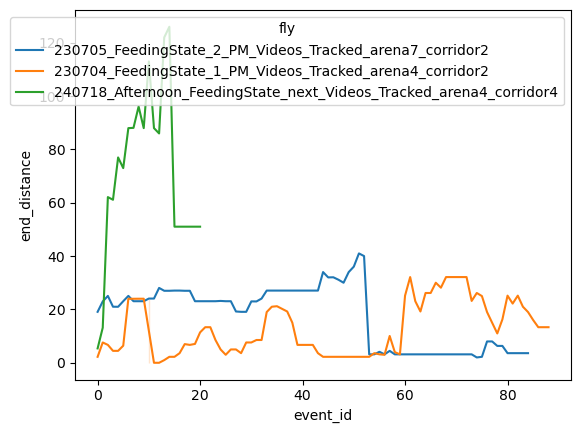

In [28]:
# Now let's plot the start_distance as y and event_id as x

sns.lineplot(data=umap_subset, x="event_id", y="end_distance", hue="fly")